In [4]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import pickle
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
raw_df = pd.read_csv('UpdatedFinalData.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 161342 Airbnb listings


/Users/anandchaturvedi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ID                                  Name AirbnbExperiences  \
0   6890068      Sunlit Downtown Artist Apartment              None   
1     60181     Sunny East Village Loft Apartment              None   
2  16578262  Sunny and comfy home in East village              None   

   AirbnbHostResponse  HostResponseTime  hasKba  hasLinkedIn  hasFacebook  \
0  within a few hours               100     1.0          0.0          0.0   
1        within a day               100     1.0          0.0          0.0   
2      within an hour               100     0.0          0.0          0.0   

   hasReviews  hasPhone  hasEmail Neighbourhood Cleansed      City State  \
0         1.0       1.0       1.0           East Village  New York    NY   
1         1.0       1.0       1.0           East Village  New York    NY   
2         1.0       1.0       1.0           East Village  New York    NY   

  Zipcode    Market Country Code   Latitude  Longitude RefinedPropertyType  \
0   10009  New York           US  40.721277 -73.978425           Apartment   
1   10009  New York           US  40.725539 -73.979564           Apartment   
2   10009  New York           US  40.730359 -73.980438           Apartment   

         Room Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type  \
0     Private room             2        1.0       1.0   1.0  Real Bed   
1  Entire home/apt             3        1.0       2.0   1.0  Real Bed   
2  Entire home/apt             3        1.0       0.0   1.0  Real Bed   

   hasHangers  hasHairDryer  hasIron  hasPetsAllowed  hasIntercom  \
0         0.0           0.0      0.0             0.0          1.0   
1         0.0           1.0      1.0             0.0          1.0   
2         1.0           1.0      1.0             0.0          0.0   

   has24CheckIn  hasShampoo  hasLaptopFriendly  hasFireExtinguisher  \
0           0.0         1.0                0.0                  0.0   
1           0.0         1.0                1.0                  1.0   
2           0.0         1.0                0.0                  0.0   

   hasHotTub  hasFamilyFriendly  hasEssentials  hasFirstAidKit  hasCableTV  \
0        0.0                1.0            1.0             1.0         0.0   
1        0.0                1.0            1.0             0.0         0.0   
2        0.0                1.0            1.0             0.0         0.0   

   hasHeating  hasCarbonMonoxideDetector  hasDryer  hasWasher  \
0         1.0                        1.0       0.0        0.0   
1         1.0                        1.0       0.0        0.0   
2         1.0                        1.0       0.0        0.0   

   hasSmokeDetector  hasKitchen  hasAirConditioning  hasWirelessInternet  \
0               1.0         1.0                 1.0                  1.0   
1               1.0         1.0                 1.0                  1.0   
2               1.0         1.0                 1.0                  1.0   

   hasInternet  hasTV  Price  Guests Included  Extra People  Minimum Nights  \
0          1.0    1.0   95.0                1             0               2   
1          1.0    0.0  210.0                2            50               7   
2          1.0    0.0  149.0                2            40               2   

   Maximum Nights  Number of Reviews  Review Scores Rating  \
0            1125                 21                  86.0   
1              60                 30                  96.0   
2              30                  8                  88.0   

   Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
0                     9.0                        8.0                    9.0   
1                    10.0                        9.0                   10.0   
2                     9.0                        9.0                   10.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                          9.0                     9.0                  9.0   
1                     

In [6]:

cols_to_drop = ['Zipcode','Name', 'AirbnbExperiences', 'AirbnbHostResponse', 'HostResponseTime', 'hasKba', 'hasLinkedIn', 'hasFacebook', 'hasReviews', 'hasPhone', 'hasEmail','Neighbourhood Cleansed','State', 'Market',
#                 'Country',
                'Country Code',
                'City',
#                 'Latitude',
#                 'Longitude',
                'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
#                 'Number of Reviews',
                'Review Scores Rating',
                'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'hasInstantBookable', 'hasExactLocation','hasProfilePic']
df = raw_df.drop(cols_to_drop, axis=1)

In [7]:
df.isna().sum()
df.set_index('ID', inplace=True)

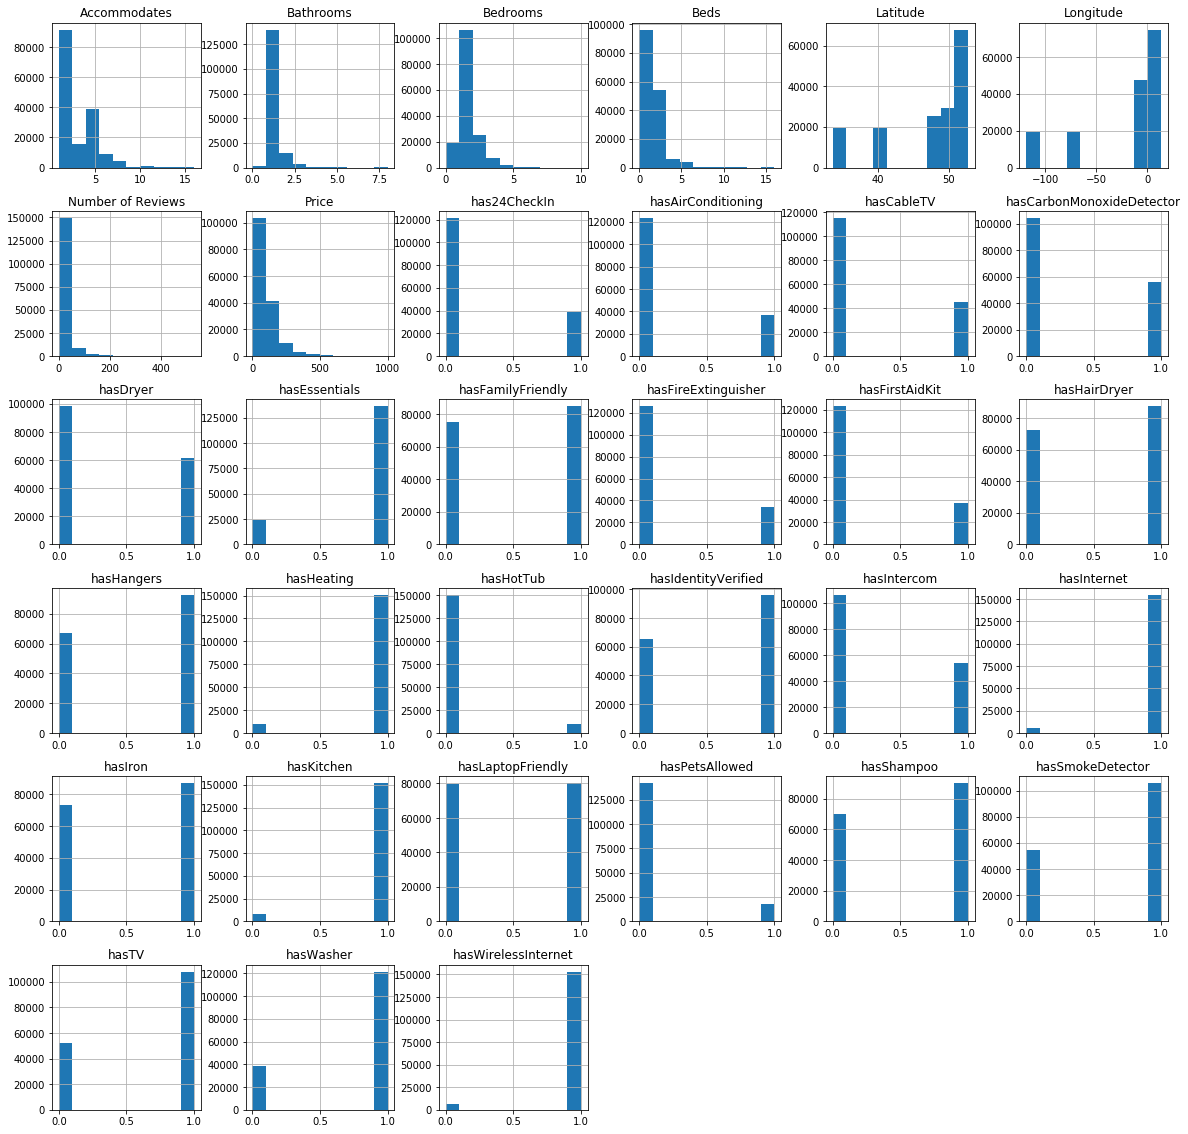

In [8]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));


In [9]:

# df.Zipcode.fillna("unknown", inplace=True)
# df.Zipcode.value_counts(normalize=True)

In [10]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.RefinedPropertyType.value_counts()

Apartment          135272
House               18958
Other                2096
Loft                 1796
Bed & Breakfast      1759
Townhouse             952
Guesthouse            509
Name: RefinedPropertyType, dtype: int64

In [11]:
for col in ['Bathrooms', 'Bedrooms', 'Beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [12]:

# df.Price = df.Price.str[1:-3]
# df.Price = df.Price.str.replace(",", "")
# df.Price = df.Price.astype('int64')
df.dropna(subset=['Price'], inplace=True)

In [13]:
df.Cancellation_Policy.value_counts()

strict             62279
flexible           56674
moderate           41831
super_strict_30       30
super_strict_60       10
Name: Cancellation_Policy, dtype: int64

In [14]:
df.Cancellation_Policy.replace({
    'super_strict_30': 'strict',
    'super_strict_60': 'strict',
    }, inplace=True)

In [15]:
df.Price.isna().sum()


0

In [16]:
transformed_df = pd.get_dummies(df)

In [17]:

numerical_columns = ['Accommodates', 'Bedrooms', 'Bathrooms','Beds']
for col in transformed_df.columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.02) # Replacing 0s with 0.02
    transformed_df[col] = np.log(transformed_df[col])

/Users/anandchaturvedi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
# Separating X and y
X = transformed_df.drop('Price', axis=1)
y = transformed_df.Price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))
transformed_df.shape

(160824, 51)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

/Users/anandchaturvedi/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


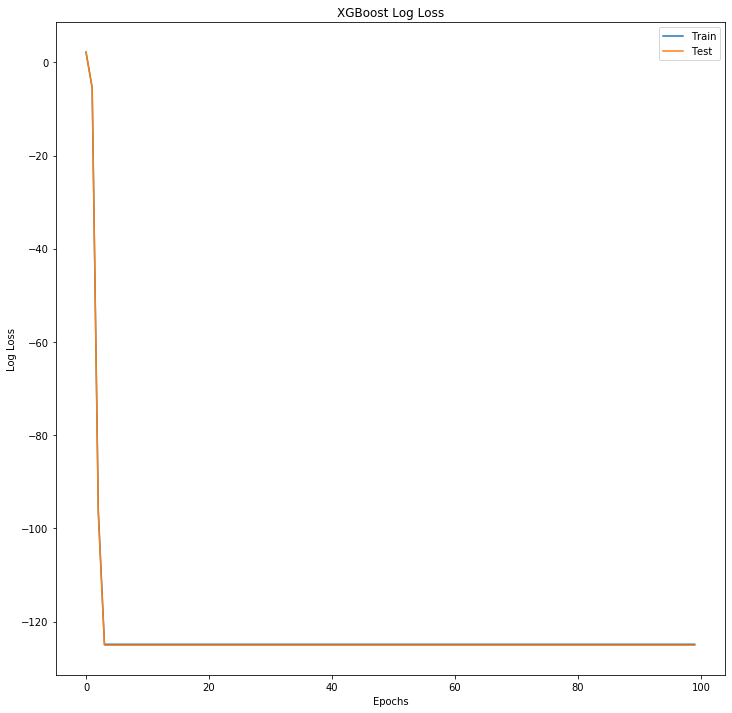

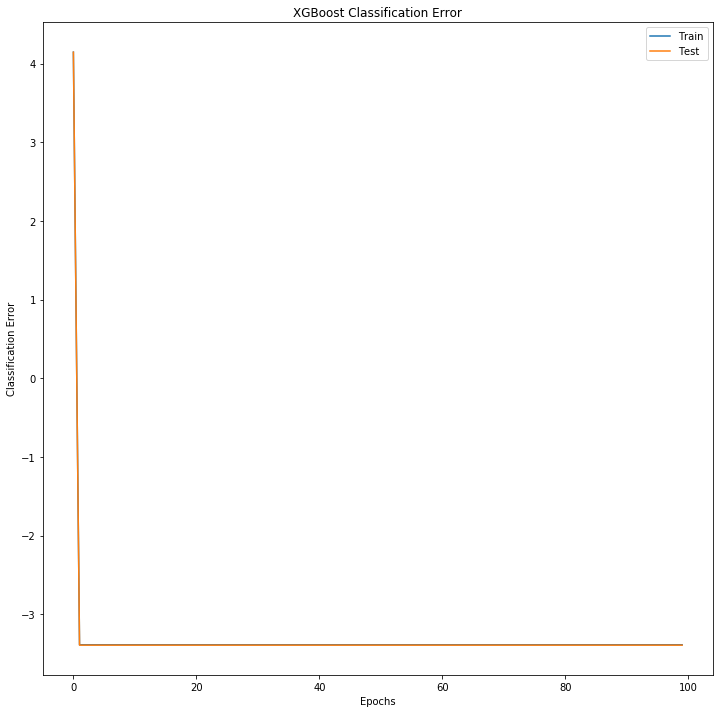

Time taken to run: 0.3 minutes

Training MSE: 0.1238
Test MSE: 0.1269

Training r2: 0.7383
Test r2: 0.7325


In [30]:
xgb_reg_start = time.time()
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_reg = xgb.XGBRegressor(base_score=0.007, colsample_bylevel=1,
       colsample_bytree=0.95, gamma=0, learning_rate=0.09,
       max_delta_step=0, max_depth=11, min_child_weight=1, 
       n_estimators=100, nthread=-1, objective='reg:linear', reg_alpha=0.98,
       reg_lambda=1, scale_pos_weight=5, seed=0, silent=True,
       subsample=0.9)
xgb_reg.fit(X_train, y_train,eval_metric=["error", "logloss"],eval_set = eval_set, verbose=False)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()
results = xgb_reg.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.xlabel('Epochs')
pyplot.title('XGBoost Log Loss')
pyplot.show()

    # plot classification error
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.xlabel('Epochs')
pyplot.title('XGBoost Classification Error')
pyplot.show()
print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Test MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Test r2:", round(r2_score(y_test, val_preds_xgb_reg),4))
# val_preds_xgb_reg.to_csv('Airbnb-predictions.csv', header=True)
np.savetxt("Airbnb-predictions.csv", np.exp(val_preds_xgb_reg), delimiter=",")
filename = 'Airbnb_model.sav'
pickle.dump(xgb_reg, open(filename, 'wb'))

In [22]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg.to_csv('Airbnb-weights.csv', header=True)
ft_weights_xgb_reg

weight
RefinedPropertyType_Guesthouse       0.001157
Bed_Type_Airbed                      0.001214
Bed_Type_Couch                       0.001451
Bed_Type_Futon                       0.001508
Bed_Type_Pull-out Sofa               0.001598
Cancellation_Policy_moderate         0.001614
RefinedPropertyType_Townhouse        0.001620
hasFirstAidKit                       0.001628
hasPetsAllowed                       0.001719
has24CheckIn                         0.001881
hasWirelessInternet                  0.001988
hasIdentityVerified                  0.001992
hasCarbonMonoxideDetector            0.001998
hasHeating                           0.002111
Cancellation_Policy_flexible         0.002166
hasEssentials                        0.002201
hasShampoo                           0.002272
Beds                                 0.002317
hasIron                              0.002370
hasHangers                           0.002373
hasFireExtinguisher                  0.002378
hasSmokeDetector                     0.002429
hasHairDryer                         0.002461
hasFamilyFriendly                    0.002507
hasLaptopFriendly                    0.002575
RefinedPropertyType_Other            0.002591
Number_of_Reviews                    0.002758
hasHotTub                            0.002816
hasInternet                          0.002914
hasIntercom                          0.003239
hasKitchen                           0.003278
RefinedPropertyType_House            0.003605
hasWasher                            0.003980
Bed_Type_Real Bed                    0.004887
RefinedPropertyType_Apartment        0.005437
Cancellation_Policy_strict           0.005682
RefinedPropertyType_Loft             0.005791
RefinedPropertyType_Bed & Breakfast  0.007121
hasCableTV                           0.007777
Longitude                            0.011783
hasDryer                             0.013338
hasTV                                0.013992
Room_Type_Shared room                0.017970
Latitude                             0.018302
Room_Type_Private room               0.034973
Bathrooms                            0.040029
hasAirConditioning                   0.056204
Bedrooms                             0.065200
Accommodates                         0.071672
Room_Type_Entire home/apt            0.545131

In [23]:
transformed_df.head(5)
# .to_csv('Airbnb-sample-data',header = True)

Latitude  Longitude  Accommodates  Bathrooms  Bedrooms      Beds  \
ID                                                                           
6890068   3.706751        NaN      0.693147        0.0  0.000000  0.000000   
60181     3.706855        NaN      1.098612        0.0  0.693147  0.000000   
16578262  3.706974        NaN      1.098612        0.0 -3.912023  0.000000   
3969366   3.706789        NaN      1.386294        0.0  0.693147  0.693147   
9093991   3.706902        NaN      0.693147        0.0  0.000000  0.000000   

          hasHangers  hasHairDryer   hasIron  hasPetsAllowed  hasIntercom  \
ID                                                                          
6890068    -3.912023     -3.912023 -3.912023       -3.912023     0.000000   
60181      -3.912023      0.000000  0.000000       -3.912023     0.000000   
16578262    0.000000      0.000000  0.000000       -3.912023    -3.912023   
3969366    -3.912023     -3.912023 -3.912023       -3.912023     0.000000   
9093991    -3.912023      0.000000  0.000000       -3.912023     0.000000   

          has24CheckIn  hasShampoo  hasLaptopFriendly  hasFireExtinguisher  \
ID                                                                           
6890068      -3.912023    0.000000          -3.912023            -3.912023   
60181        -3.912023    0.000000           0.000000             0.000000   
16578262     -3.912023    0.000000          -3.912023            -3.912023   
3969366      -3.912023   -3.912023          -3.912023            -3.912023   
9093991       0.000000    0.000000           0.000000            -3.912023   

          hasHotTub  hasFamilyFriendly  hasEssentials  hasFirstAidKit  \
ID                                                                      
6890068   -3.912023           0.000000            0.0        0.000000   
60181     -3.912023           0.000000            0.0       -3.912023   
16578262  -3.912023           0.000000            0.0       -3.912023   
3969366   -3.912023           0.000000            0.0       -3.912023   
9093991   -3.912023          -3.912023            0.0       -3.912023   

          hasCableTV  hasHeating  hasCarbonMonoxideDetector  hasDryer  \
ID                                                                      
6890068    -3.912023         0.0                   0.000000 -3.912023   
60181      -3.912023         0.0                   0.000000 -3.912023   
16578262   -3.912023         0.0                   0.000000 -3.912023   
3969366    -3.912023         0.0                   0.000000 -3.912023   
9093991    -3.912023         0.0                  -3.912023  0.000000   

          hasWasher  hasSmokeDetector  hasKitchen  hasAirConditioning  \
ID                                                                      
6890068   -3.912023          0.000000         0.0                 0.0   
60181     -3.912023          0.000000         0.0                 0.0   
16578262  -3.912023          0.000000         0.0                 0.0   
3969366   -3.912023          0.000000         0.0                 0.0   
9093991    0.000000         -3.912023         0.0                 0.0   

          hasWirelessInternet  hasInternet     hasTV     Price  \
ID                                                               
6890068                   0.0          0.0  0.000000  4.553877   
60181                     0.0          0.0 -3.912023  5.347108   
16578262                  0.0          0.0 -3.912023  5.003946   
3969366                   0.0          0.0  0.000000  5.298317   
9093991                   0.0          0.0  0.000000  5.164786   

          Number_of_Reviews  hasIdentityVerified  \
ID                                                 
6890068            3.044522                  0.0   
60181              3.401197                  0.0   
16578262           2.079442                  0.0   
3969366            0.000000                  0.0   
9093991            1.386294                  0.0   

          Re

In [24]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               6528      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 105,601
Trainable params: 105,601
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# # Training the model
# nn2_start = time.time()

# nn2_history = nn2.fit(X_train,
#                   y_train,
#                   epochs=100,
#                   batch_size=412,
#                   validation_split = 0.1)

# nn2_end = time.time()
loaded_model = pickle.load(open('Airbnb_model.sav', 'rb'))
xgb.__version__

'0.90'

In [26]:
# def nn_model_evaluation(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):

#     # MSE and r squared values
#     y_test_pred = model.predict(X_test)
#     y_train_pred = model.predict(X_train)
#     print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
#     print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
#     print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
#     print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

In [27]:
# nn_model_evaluation(nn2)